# **Imports**

Taken from : https://www.kaggle.com/datasets/utkarshsaxenadn/weather-classification-resnet152v2

In [9]:
# Common
import keras
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm

# Data
from tensorflow.image import resize
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.utils import load_img, img_to_array

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt

# TL Model
from tensorflow.keras.applications import ResNet50, ResNet50V2, InceptionV3, Xception, ResNet152, ResNet152V2

# Model
from keras import Sequential
from keras.layers import Dense, GlobalAvgPool2D, Dropout
from keras.models import load_model

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Performance
from sklearn.metrics import classification_report

# Model Viz
from tensorflow.keras.utils import plot_model

# Data and utilities

In [10]:
# Cateories
class_names = {0: 'cloudy', 1: 'foggy', 2: 'rainy', 3: 'shine', 4: 'sunrise'}

In [11]:
def load_image(path):
    '''
    Takes in path of the image and load it
    '''
    img = resize(img_to_array(load_img(path))/255., (256,256))
    return img

In [12]:
def show_image(image, title=None):
    '''
    Takes in an Image and plot it with Matplotlib
    '''
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

In [13]:
def load_data(img_paths):
    X = np.zeros(shape=(len(img_paths), 256,256,3))

    for i, path in tqdm(enumerate(img_paths), desc="Loading"):
        X[i] = load_image(path)
    
    return X

# Load images

In [17]:
image_paths = sorted(glob('./data/*.jpg'))
print(f"Total Number of Images : {len(image_paths)}")

Total Number of Images : 5


In [18]:
image_paths[:5]

['./data/pexels-andre-furtado-1162251.jpg',
 './data/pexels-brett-sayles-1431822.jpg',
 './data/pexels-guillaume-meurice-1591447.jpg',
 './data/pexels-pixabay-209831.jpg',
 './data/pexels-tahir-shaw-186980.jpg']

In [19]:
images = load_data(image_paths)

Loading: 5it [00:04,  1.08it/s]


# **Data Viz**

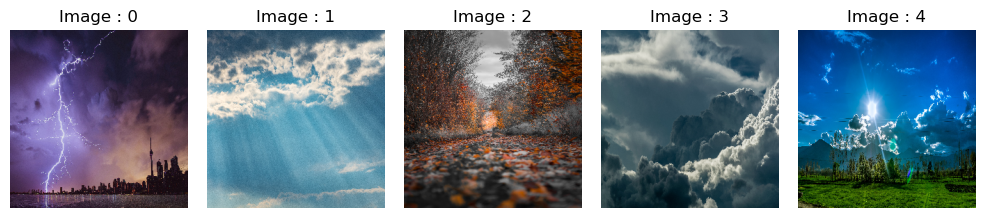

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    
    if i > len(images)-1:
        break
    
    image = images[i]

    plt.subplot(5,5,i+1)
    show_image(image, title=f"Image : {i}")
plt.tight_layout()
plt.show()

# Prediction with pre-trained ResNet152V2 model

In [25]:
# Load model
model_v3 = load_model('./data/ResNet152V2-Weather-Classification-03.h5')
model_v3

In [22]:
# Make Predictions
preds = np.argmax(model_v3.predict(images), axis=-1)

1/1 [==============================] - 3s 3s/step


# Result

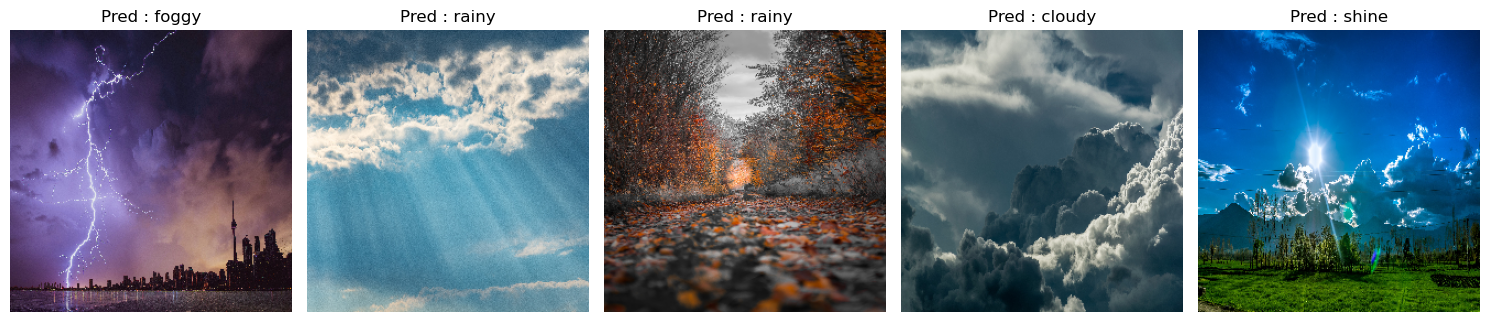

In [23]:
plt.figure(figsize=(15,20))
for i, im in enumerate(images):

    # Make Prediction
    pred = class_names[list(preds)[i]]
    
    # Show Prediction
    plt.subplot(5,5,i+1)
    show_image(im, title=f"Pred : {pred}")
    
    
plt.tight_layout()
plt.show()